### Brain-hacking 101

Author: [**Ariel Rokem**](http://arokem.org), [**The University of Washington eScience Institute**](http://escience.washington.edu)

### Hack 2: Look at your data

A picture is worth a thousand words. Data visualization allows you to look directly at different aspects of the data that are not readily available to you by just looking at the numbers. 

In this tutorial, we will look at the FIAC data using the [Matplotlib](http://matplotlib.org) software library. Matplotlib is an open-source software library that can be used to create beautiful 2-d data visualizations, such as lines, scatter-plots, and images. It can be used to produce publication-quality figures in a variety of file-formats.

Let's 

In [1]:
import numpy as np
import nibabel as nib

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
img = nib.load('./data/run1.nii.gz')
data = img.get_data()

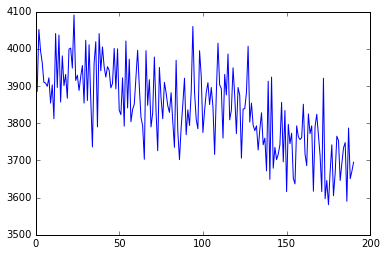

In [5]:
fig, ax = plt.subplots(1)
ax.plot(data[32, 32, 15, :])

Congratulations! You first MPL plot. Let's make this a little bit larger, use a style to make it look better, and add some annotations. 

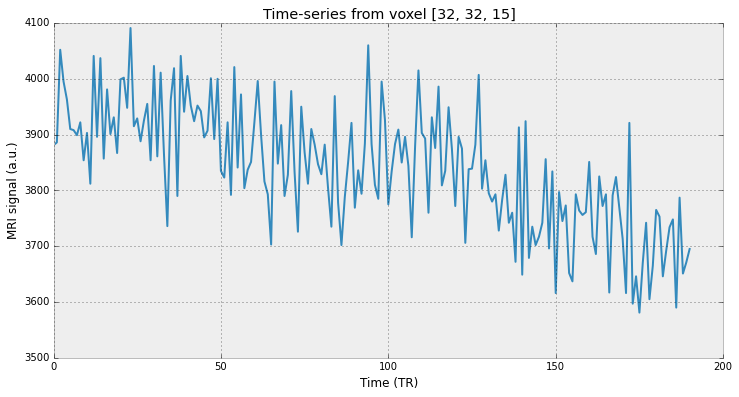

In [6]:
mpl.style.use('bmh')
fig, ax = plt.subplots(1)
ax.plot(data[32, 32, 15, :])
ax.set_xlabel('Time (TR)')
ax.set_ylabel('MRI signal (a.u.)')
ax.set_title('Time-series from voxel [32, 32, 15]')
fig.set_size_inches([12, 6])

## Impressions about the data?

If we want to compare several voxels side by side we can plot them on the same axis:

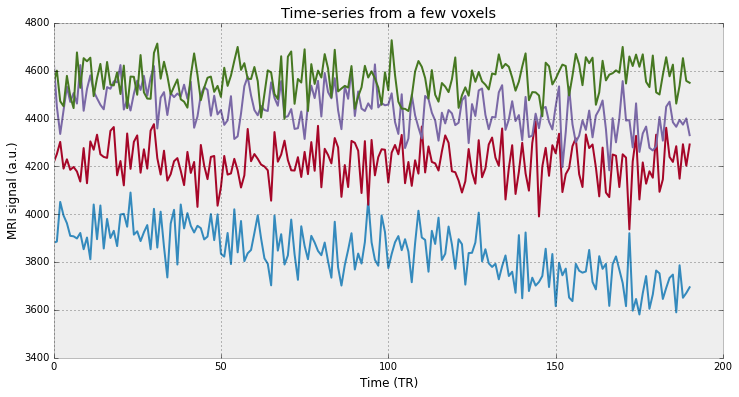

In [7]:
fig, ax = plt.subplots(1)
ax.plot(data[32, 32, 15, :])
ax.plot(data[32, 32, 14, :])
ax.plot(data[32, 32, 13, :])
ax.plot(data[32, 32, 12, :])
ax.set_xlabel('Time (TR)')
ax.set_ylabel('MRI signal (a.u.)')
ax.set_title('Time-series from a few voxels')
fig.set_size_inches([12, 6])

Alternatively, we can create different subplots for each time-series

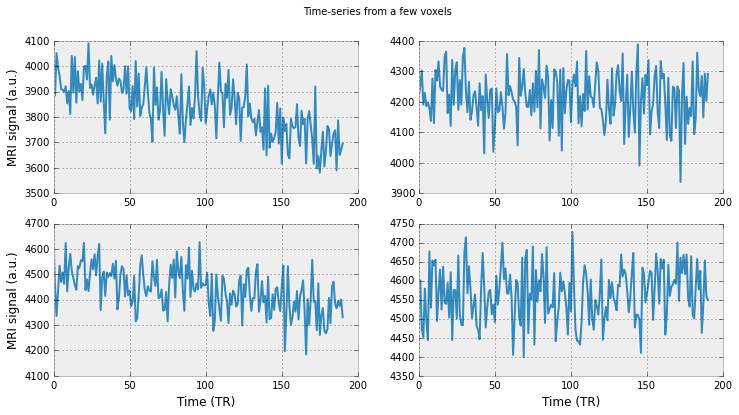

In [8]:
fig, ax = plt.subplots(2, 2)
# ax is now an array!
ax[0, 0].plot(data[32, 32, 15, :])
ax[0, 1].plot(data[32, 32, 14, :])
ax[1, 0].plot(data[32, 32, 13, :])
ax[1, 1].plot(data[32, 32, 12, :])
ax[1, 0].set_xlabel('Time (TR)')
ax[1, 1].set_xlabel('Time (TR)')
ax[0, 0].set_ylabel('MRI signal (a.u.)')
ax[1, 0].set_ylabel('MRI signal (a.u.)')
# Note that we now set the title through the fig object!
fig.suptitle('Time-series from a few voxels')
fig.set_size_inches([12, 6])

Another kind of plot is an image. For example, we can take a look at the mean and standard deviation of the time-series for one entire slice:

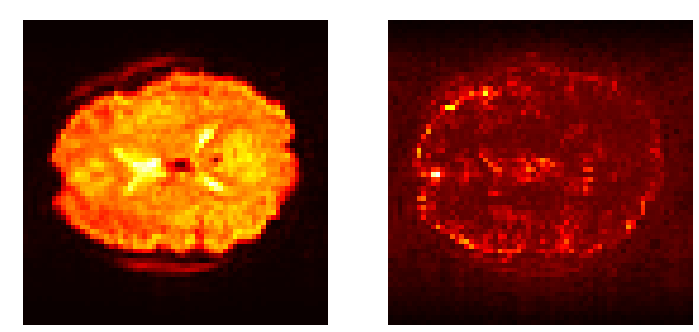

In [9]:
fig, ax = plt.subplots(1, 2)
# We'll use a reasonable colormap, and no smoothing:
ax[0].matshow(np.mean(data[:, :, 15], -1), cmap=mpl.cm.hot)
ax[0].axis('off')
ax[1].matshow(np.std(data[:, :, 15], -1), cmap=mpl.cm.hot)
ax[1].axis('off')
fig.set_size_inches([12, 6])
# You can save the figure to file:
fig.savefig('mean_and_std.png')

There are many other kinds of figures you could create:

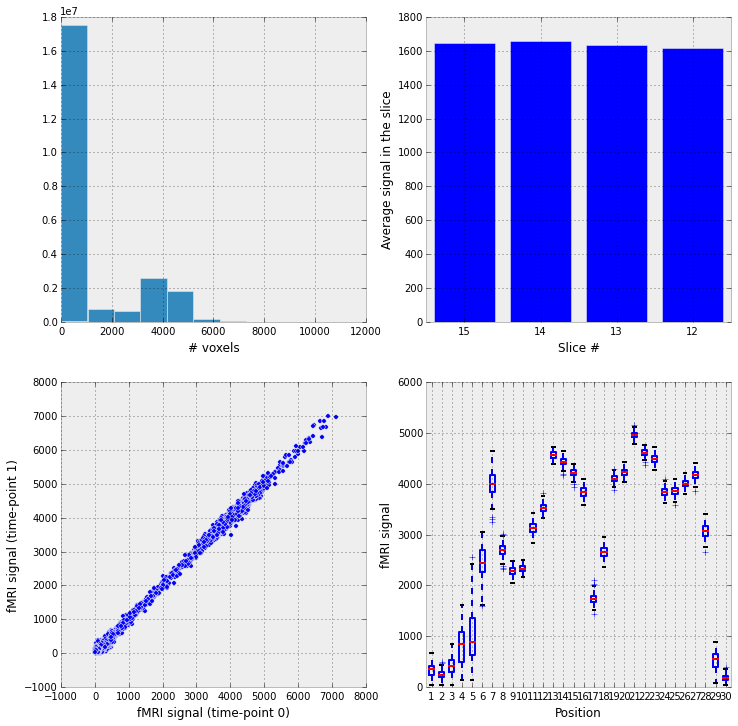

In [10]:
fig, ax = plt.subplots(2, 2)
# Note the use of `ravel` to create a 1D array:
ax[0, 0].hist(np.ravel(data))
ax[0, 0].set_xlabel("fMRI signal")
ax[0, 0].set_ylabel("# voxels")

# Bars are 0.8 wide:
ax[0, 1].bar([0.6, 1.6, 2.6, 3.6], [np.mean(data[:, :, 15]), np.mean(data[:, :, 14]), np.mean(data[:, :, 13]), np.mean(data[:, :, 12])])
ax[0, 1].set_ylabel("Average signal in the slice")
ax[0, 1].set_xticks([1,2,3,4])
ax[0, 1].set_xticklabels(["15", "14", "13", "12"])
ax[0, 1].set_xlabel("Slice #")

# Compares subsequent time-points:
ax[1, 0].scatter(data[:, :, 15, 0], data[:, :, 15, 1])
ax[1, 0].set_xlabel("fMRI signal (time-point 0)")
ax[1, 0].set_ylabel("fMRI signal (time-point 1)")

# `.T` denotes a transposition
ax[1, 1].boxplot(data[32, 32].T)
fig.set_size_inches([12, 12])
ax[1, 1].set_xlabel("Position")
ax[1, 1].set_ylabel("fMRI signal")

One way to learn more about all the different options available in Matplotlib is to visit the [gallery](http://matplotlib.org/gallery.html)